## Material Partitioning Benchmark Result Visualization

In [1]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

from ase import Atoms
from ase.visualize import view
from ase.build import make_supercell
from ase.io import read

from torch_geometric.utils import to_networkx
import matplotlib.pyplot as plt

Load material ids

In [2]:
from ase.io import write

FULL_DF_FILE = 'n_1000000_full_mattersim.csv'
PARTITION_DF_FILE = 'n_1000000_partitions_mattersim.csv'

all_df = pd.read_csv(FULL_DF_FILE)
partition_df = pd.read_csv(PARTITION_DF_FILE)

In [3]:
partition_df

,method,core_n,n
0,metis,132247,191939
1,metis,133179,193691
2,metis,133464,194440
3,metis,134672,194040
4,metis,133693,194701
...,...,...,...
2395,metis_unweighted,128485,180854
2396,metis_unweighted,130031,184143
2397,metis_unweighted,130029,184057
2398,metis_unweighted,130018,183301


In [4]:
summary = all_df.groupby("method")[[
    "core_max", "core_min", "core_mean",
    "core_std", "core_range"
]].mean().round(3)

print(summary.to_string(line_width=1000))
print('\n\n')

summary = all_df.groupby("method")[[
    "ext_max", "ext_min", "ext_mean",
    "ext_std", "ext_range"
]].mean().round(3)

print(summary.to_string(line_width=1000))

                   core_max   core_min   core_mean  core_std  core_range
method                                                                  
grid              131184.47  128979.18  130062.326   744.441    1122.144
metis             131350.99  128930.19  130062.326   781.661    1288.664
metis_unweighted  131165.63  128958.68  130062.326   707.684    1103.304



                    ext_max    ext_min    ext_mean   ext_std  ext_range
method                                                                 
grid              270489.98  266300.11  268307.334  1430.249   2182.646
metis             231620.33  225773.02  228563.034  1891.040   3057.296
metis_unweighted  231392.93  225667.99  228392.246  1813.441   3000.684


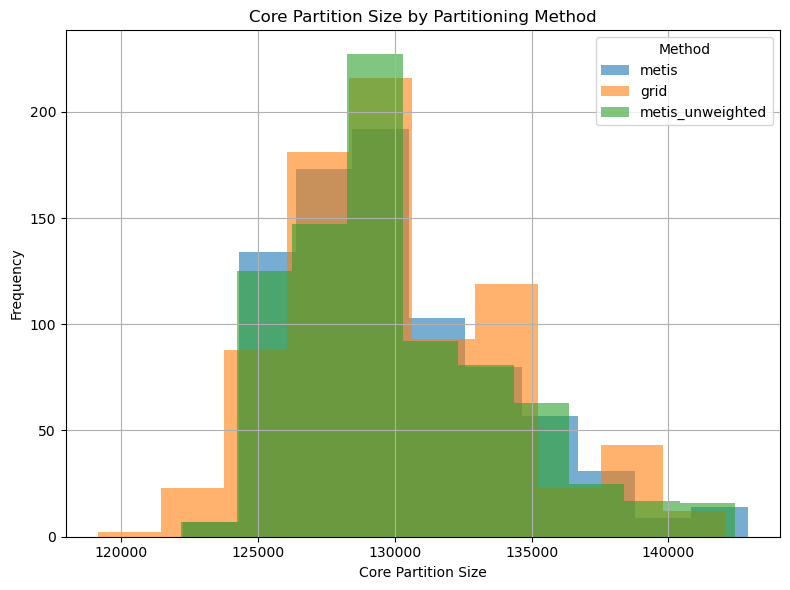

In [5]:
methods = partition_df['method'].unique()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:purple']  # Add more if needed
bins = 10

plt.figure(figsize=(8, 6))

for method, color in zip(methods, colors):
    subset = partition_df[partition_df['method'] == method]['core_n']
    plt.hist(subset, bins=bins, alpha=0.6, label=method, color=color)

plt.title("Core Partition Size by Partitioning Method")
plt.xlabel("Core Partition Size")
plt.ylabel("Frequency")
plt.legend(title="Method")
plt.grid(True)
plt.tight_layout()
plt.show()

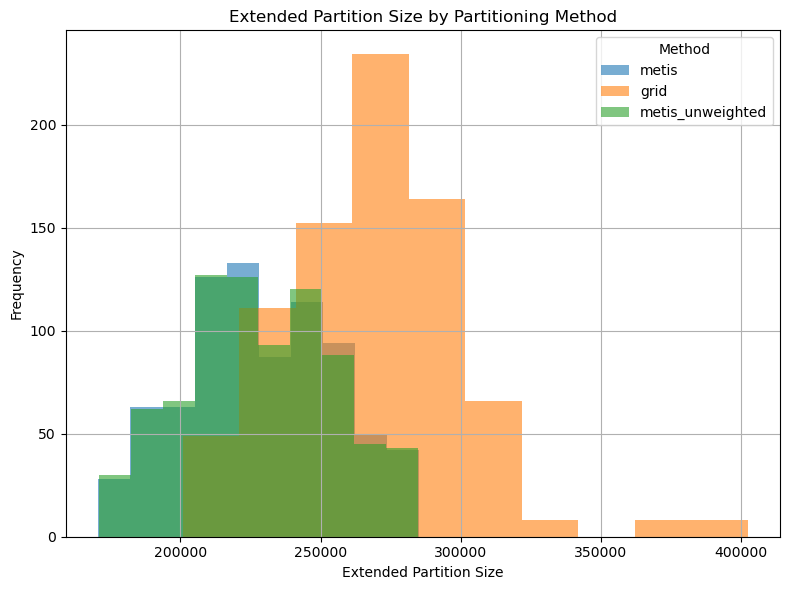

In [6]:
methods = partition_df['method'].unique()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:purple']  # Add more if needed
bins = 10

plt.figure(figsize=(8, 6))

for method, color in zip(methods, colors):
    subset = partition_df[partition_df['method'] == method]['n']
    plt.hist(subset, bins=bins, alpha=0.6, label=method, color=color)

plt.title("Extended Partition Size by Partitioning Method")
plt.xlabel("Extended Partition Size")
plt.ylabel("Frequency")
plt.legend(title="Method")
plt.grid(True)
plt.tight_layout()
plt.show()

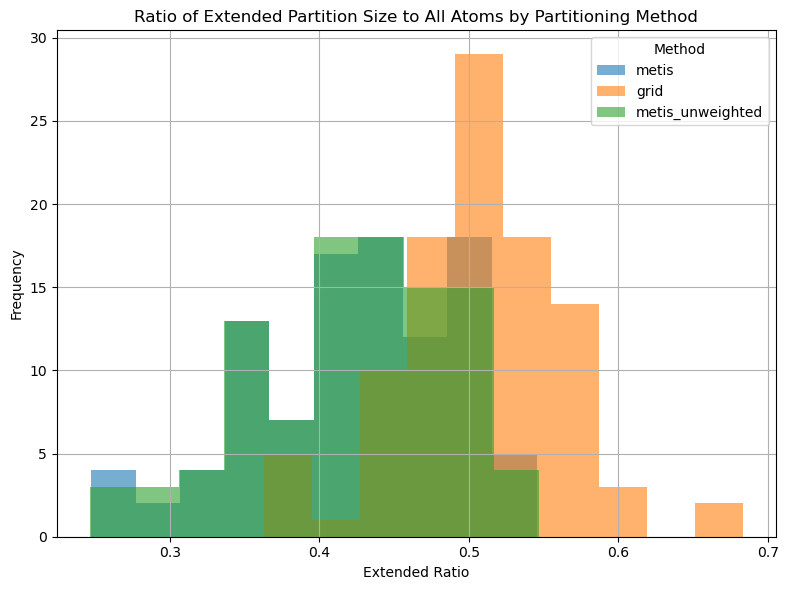

In [7]:
methods = all_df['method'].unique()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:purple']  # Add more if needed
bins = 10

plt.figure(figsize=(8, 6))

for method, color in zip(methods, colors):
    subset = all_df[all_df['method'] == method]['extended_ratio']
    plt.hist(subset, bins=bins, alpha=0.6, label=method, color=color)

plt.title("Ratio of Extended Partition Size to All Atoms by Partitioning Method")
plt.xlabel("Extended Ratio")
plt.ylabel("Frequency")
plt.legend(title="Method")
plt.grid(True)
plt.tight_layout()
plt.show()